<h1><center>Iris Flower Classification</center></h1>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
# Load the Dataset

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Target'] = iris.target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

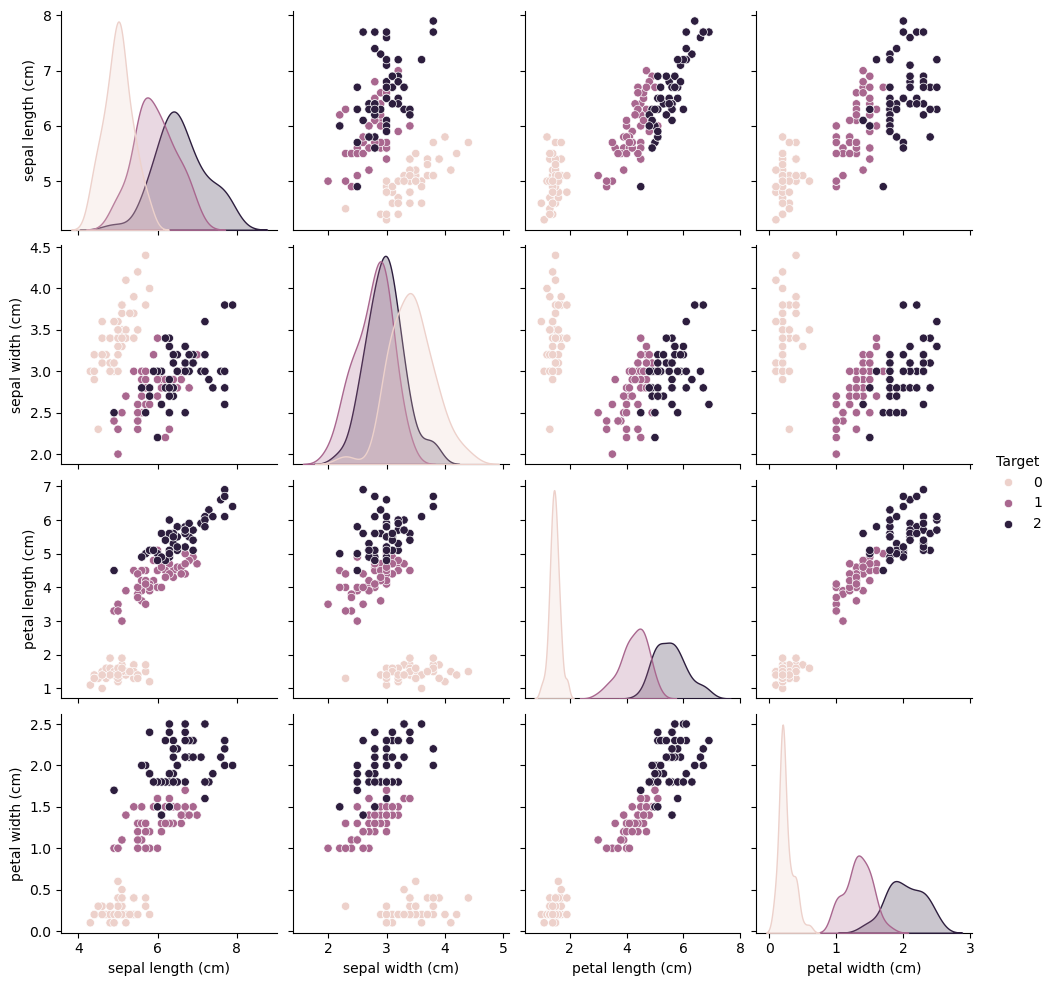

In [38]:
# Exploratory Data Analysis(EDA)

print(df.info())
print(df.describe())
sns.pairplot(df, hue='Target')
plt.show()

In [39]:
# Splitting the data into Train and Test Splits

X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Train the Machine Learning Model

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [83]:
# Evaluate the Model

y_pred = model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [84]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


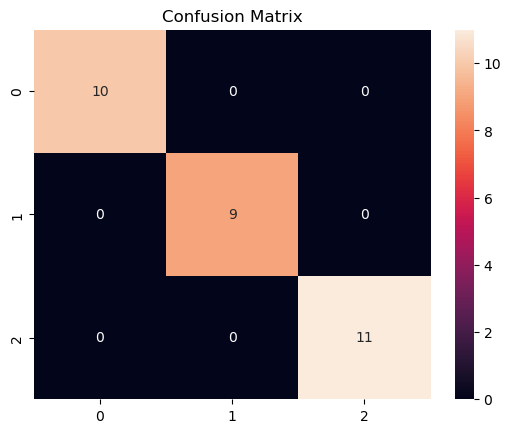

In [85]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Matrix')
plt.show()

In [72]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])
sample_scaled = scaler.transform(sample)
predicted_class = model.predict(sample_scaled)
print('Predicted Class:', iris.target_names[predicted_class][0])

Predicted Class: setosa


C:\Users\ASUS CORE I5\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
